In [4]:
!pip install matplotlib
!pip install scipy

    100% |████████████████████████████████| 25.9MB 48kB/s eta 0:00:011   69% |██████████████████████▎         | 18.1MB 4.4MB/s eta 0:00:02


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np, scipy.stats as st
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [14]:
timestamp=0

def read_json(filename, parameter):
    """
    Return the list of values for specified parameter.
    
    filename (string): the logs filename generated by iperf3 with --json flag
    parameter (string): the field of json file. For example "bits_per_second", "jitter_ms"
    """
    param_list = []
    with open(filename) as json_file:
        data = json.load(json_file)
        data = data['intervals']
        for stream in data:
            param_list.append(stream['streams'][0][parameter])
    
    return param_list

def plot_bandwidth(exp_data, exp_name, port_prefix='5000', offset=None, total_bandwidth=100, experiment_time_sec=60):
    """
    Build a plot of the change in throughput depends on time of experiment.
    
    exp_data (list): the list of lists produced by 'read_json' function.
    exp_name (string): the title of plot. Preferably with timestamp.
    port_prefix (string): this value is used for labels on plot. For port prefix 5000 the labels are 50000, 50001, 50002
    offset (list): the list of offsets in seconds. For example the traffic on 1 port generated from [20s-60s],
    and on 2,3 ports from [0s-60s], the offset value should be [20, 0, 0].
    total_bandwidth (int): this value is used to specify top border for y axes
    experiment_time_sec (int): his value is used to specify right border for x axes
    """
    plt.figure(figsize=(10,5))
    markers = ['o', 'x', '*', '>', '+', '.', ',', 'v', 'X', 'D', '|']
    
    plt.grid()
    plt.xlim(left=0, right=experiment_time_sec)
    plt.ylim(bottom=0, top=total_bandwidth)
    plt.title(exp_name)
    plt.xlabel('Time, s')
    plt.ylabel('RX speed, Mbps')
    offset = [0] * len(exp_data) if offset is None else offset  # Set the offset equal 0
    
    for i, data in enumerate(exp_data):
        data = [bps/1000000 for bps in data]  # Convert bps in mbps
        plt.plot(range(offset[i], offset[i]+len(data)), data, 
        label=f'Port: {port_prefix}{i}', marker=markers[i % len(markers)])
    
    plt.legend()
    
    

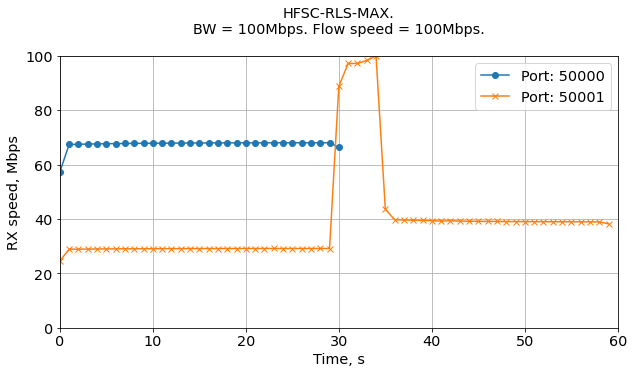

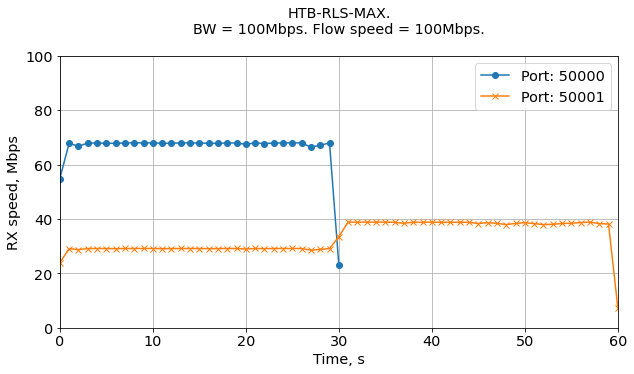

In [18]:
'''
max2hfsc

sudo tc qdisc add dev enp0s8 root handle 1: hfsc default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 hfsc ls rate 100mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 hfsc ls rate 1.5mbit ul rate 1.5mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:11 hfsc ls rate 70mbit ul rate 80mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:1 classid 1:12 hfsc ls rate 30mbit ul rate 40mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12
'''
timestamp = '1621244763'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/max2_hfsc/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HFSC-RLS-MAX.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)

'''
max2htb

sudo tc qdisc add dev enp0s8 root handle 1: htb default 999
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 htb rate 1.5mbit ceil 1.5mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:11 htb rate 70mbit ceil 80mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:1 classid 1:12 htb rate 30mbit ceil 40mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12
'''

timestamp = '1621244519'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/max2_htb/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HTB-RLS-MAX.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)


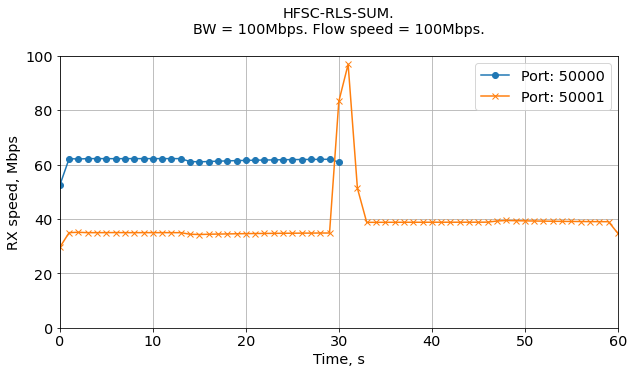

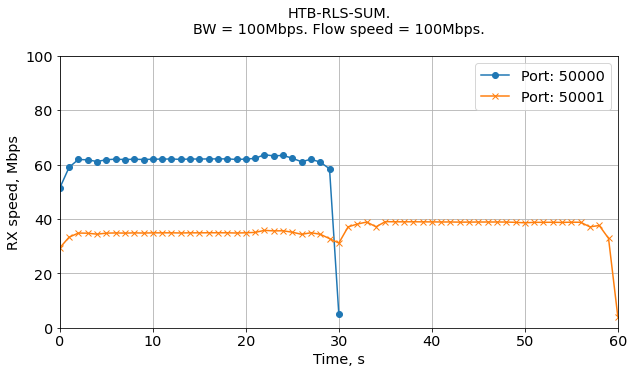

In [19]:
'''
sum2hfsc

sudo tc qdisc add dev enp0s8 root handle 1: hfsc default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 hfsc ls rate 100mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 hfsc ls rate 1.5mbit ul rate 1.5mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:11 hfsc ls rate 64mbit ul rate 80mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:1 classid 1:12 hfsc ls rate 36mbit ul rate 40mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12
'''

timestamp = '1621245113'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/sum2_hfsc/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HFSC-RLS-SUM.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)


'''
sum2htb

sudo tc qdisc add dev enp0s8 root handle 1: htb default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 htb rate 100mbit ceil 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 htb rate 1.5mbit ceil 1.5mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:11 htb rate 64mbit ceil 80mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:1 classid 1:12 htb rate 36mbit ceil 40mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12
'''
timestamp = '1621244938'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/sum2_htb/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HTB-RLS-SUM.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)


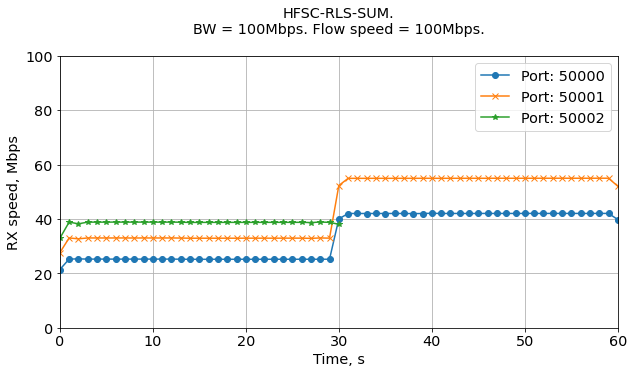

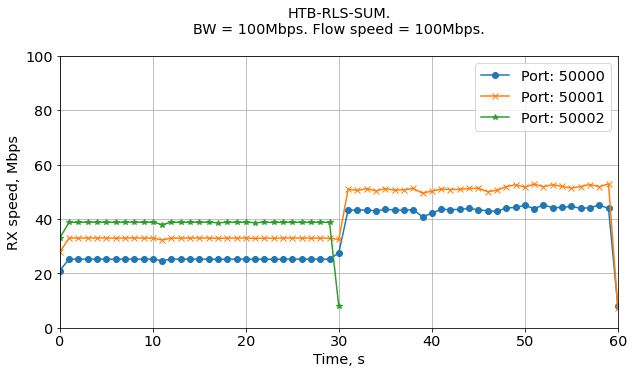

In [20]:
'''
small hierarchy hfsc sum

sudo tc qdisc add dev enp0s8 root handle 1: hfsc default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 hfsc ls rate 100mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 hfsc ls rate 1.5mbit ul rate 1.5mbit

sudo tc class add dev enp0s8 parent 1:1 classid 1:10 hfsc ls rate 60mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:20 hfsc ls rate 40mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50002 0xffff flowid 1:20

sudo tc class add dev enp0s8 parent 1:10 classid 1:11 hfsc ls rate 26mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:10 classid 1:12 hfsc ls rate 34mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12
'''

timestamp = '1621246075'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/small_hfsc_sum/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HFSC-RLS-SUM.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)


'''
small hierarchy htb sum

sudo tc qdisc add dev enp0s8 root handle 1: htb default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 htb rate 100mbit ceil 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 htb rate 1.5mbit ceil 1.5mbit

sudo tc class add dev enp0s8 parent 1:1 classid 1:10 htb rate 60mbit ceil 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:20 htb rate 40mbit ceil 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50002 0xffff flowid 1:20

sudo tc class add dev enp0s8 parent 1:10 classid 1:11 htb rate 26mbit ceil 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:10 classid 1:12 htb rate 34mbit ceil 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12
'''

timestamp = '1621268842'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/small_htb_sum/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HTB-RLS-SUM.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)



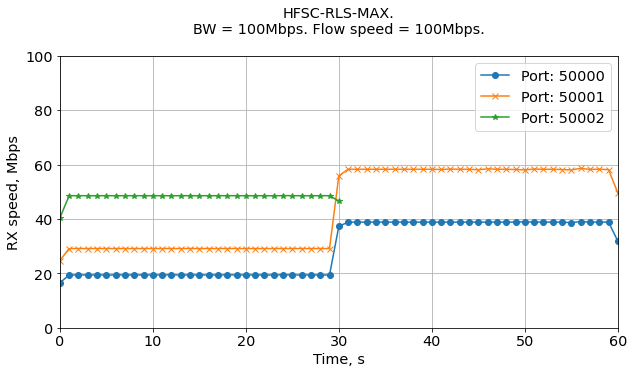

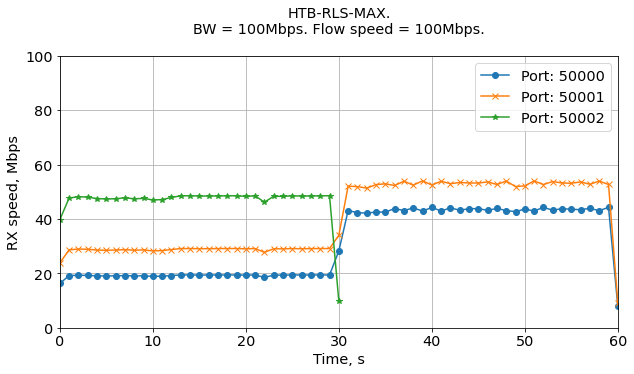

In [21]:
'''
small hierarchy hfsc max

sudo tc qdisc add dev enp0s8 root handle 1: hfsc default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 hfsc ls rate 100mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 hfsc ls rate 1.5mbit ul rate 1.5mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:10 hfsc ls rate 50mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:20 hfsc ls rate 50mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50002 0xffff flowid 1:20
sudo tc class add dev enp0s8 parent 1:10 classid 1:11 hfsc ls rate 20mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:10 classid 1:12 hfsc ls rate 30mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12

'''

timestamp = '1621269359'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/small_hfsc_max/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HFSC-RLS-MAX.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)

'''
small hierarchy htb max

sudo tc qdisc add dev enp0s8 root handle 1: htb default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 htb rate 100mbit ceil 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 htb rate 1.5mbit ceil 1.5mbit

sudo tc class add dev enp0s8 parent 1:1 classid 1:10 htb rate 50mbit ceil 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:20 htb rate 50mbit ceil 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50002 0xffff flowid 1:20

sudo tc class add dev enp0s8 parent 1:10 classid 1:11 htb rate 20mbit ceil 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:10 classid 1:12 htb rate 30mbit ceil 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12

'''

timestamp = '1621269571'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/small_htb_max/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HTB-RLS-MAX.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)


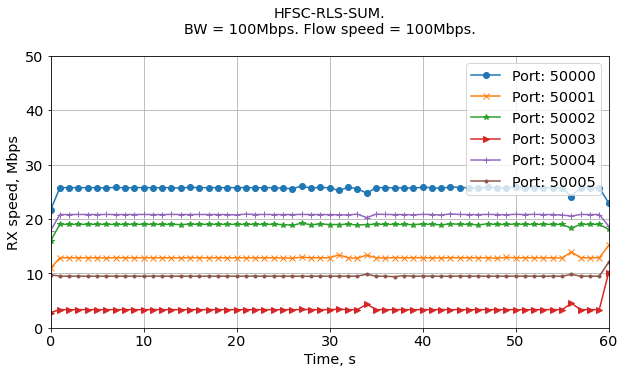

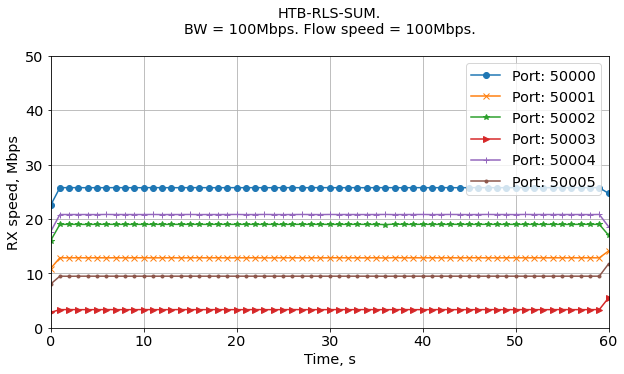

In [24]:
'''
hierarchy hfsc sum

'''

timestamp = '1621273364'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/sum_hfsc_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for exp in experiment_data:
#     v = exp[20:40] 
#     interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
#     print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')
plot_bandwidth(experiment_data, f'HFSC-RLS-SUM.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=50)

'''
hierarchy htb sum

'''
timestamp = '1621274494'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/sum_htb_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HTB-RLS-SUM.\nBW = 100Mbps. Flow speed = 100Mbps.\n', total_bandwidth=50)

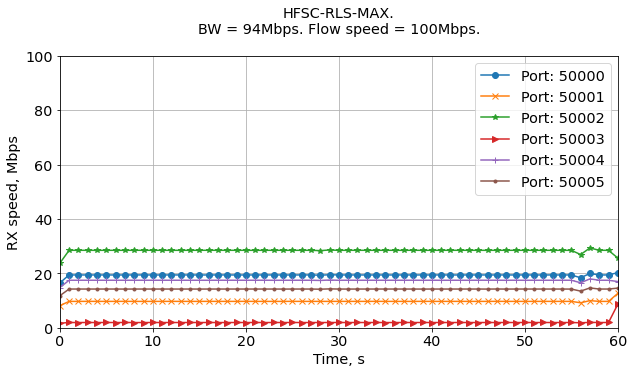

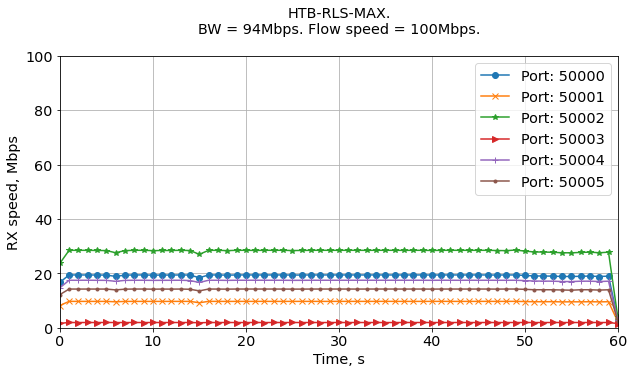

In [25]:
'''
hierarchy hfsc max

'''

timestamp = '1621275428'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/max_hfsc_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for exp in experiment_data:
#     v = exp[20:40] 
#     interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
#     print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')
plot_bandwidth(experiment_data, f'HFSC-RLS-MAX.\nBW = 94Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)

'''
hierarchy htb max

'''
timestamp = '1621275715'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/max_htb_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HTB-RLS-MAX.\nBW = 94Mbps. Flow speed = 100Mbps.\n', total_bandwidth=100)

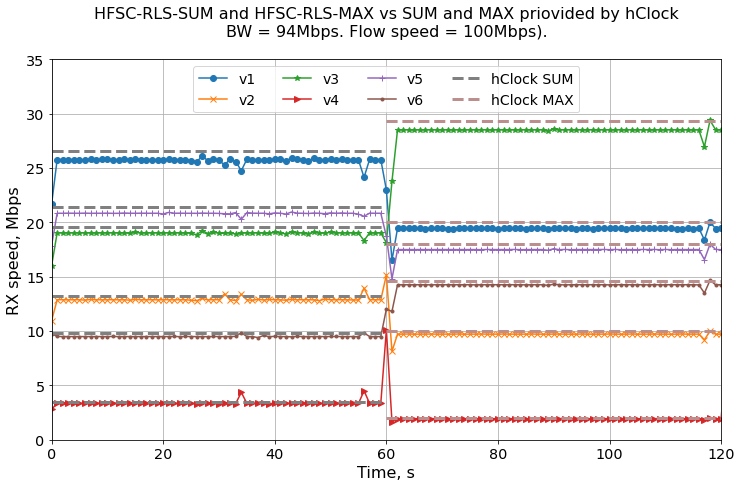

In [26]:
'''
SUM vs MAX. hierarchy hfsc.

'''

timestamp = '1621275428'
port_prefix = '5000'
experiment_amount = 6
experiment_data_sum = []
experiment_data_max = []
experiment_data = []
avgs_str = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data_sum.append(read_json(f'./logs/sum_hfsc_hclock/nresults-1621273364.txt.{current_port}', 'bits_per_second'))
    experiment_data_max.append(read_json(f'./logs/max_hfsc_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
    avg_sum = sum(experiment_data_sum[i][:-2])/(len(experiment_data_sum[i])-2)
    avg_max = sum(experiment_data_max[i][:-2])/(len(experiment_data_max[i])-2)
    avgs_str.append(f'{round(avg_sum/1000000,2)} | {round(avg_max/1000000,2)}')
    experiment_data.append(experiment_data_sum[i] + experiment_data_max[i])
    
plt.figure(figsize=(12,7))
markers = ['o', 'x', '*', '>', '+', '.', ',', 'v', 'X', 'D', '|']

plt.grid()
plt.xlim(left=0, right=120)
plt.ylim(bottom=0, top=35)
plt.title('HFSC-RLS-SUM and HFSC-RLS-MAX vs SUM and MAX priovided by hClock\nBW = 94Mbps. Flow speed = 100Mbps).\n', fontsize=16)
plt.xlabel('Time, s', fontsize=16)
plt.ylabel('RX speed, Mbps', fontsize=16)

# HFSC data
avgs_sum = []
avgs_max = []
for i, data in enumerate(experiment_data):
    data = [bps/1000000 for bps in data]  # Convert bps in mbps
    plt.plot(range(0, len(data)), data, 
    label=f'v{i+1}', marker=markers[i % len(markers)])
    avgs_sum.append(round(sum(data[1:59]) / len(data[1:59]),2))
    avgs_max.append(round(sum(data[62:119]) / len(data[62:119]),2))

hCLock_SUM = [2655, 1325, 1955, 345, 2145, 980]
for i in range(5):
    plt.plot(range(0, 61), [hCLock_SUM[i] / 100]*61, linestyle = '--', color='Gray', linewidth = 3)
    
plt.plot(range(0, 61), [hCLock_SUM[5] / 100]*61, linestyle = '--', color='Gray', linewidth = 3, label = 'hClock SUM')


hCLock_MAX = [2000, 1000, 2935, 200, 1800, 1465]
for i in range(5):
    plt.plot(range(60, 121), [hCLock_MAX[i] / 100]*61, linestyle = '--', color='rosybrown', linewidth = 3)
    
plt.plot(range(60, 121), [hCLock_MAX[5] / 100]*61, linestyle = '--', color='rosybrown', linewidth = 3, label = 'hClock MAX')


plt.legend(loc=9, ncol=4, fontsize=14)